<a href="https://colab.research.google.com/github/antonisapostoloudis/9th-Assignment-Machine-Learning/blob/main/9th_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Εργασία 9-Reinforcement Learning

## 1. Εγκατάσταση βιβλιοθηκών

In [1]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.9 MB/s eta 0:00:00


In [2]:
!pip install gymnasium[box2d]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 28.2 MB/s eta 0:00:00


In [3]:
!pip install renderlab

## 2. Βασικές συναρτήσεις Gymnasium

reset(): Αρχικοποιεί το περιβάλλον και επιστρέφει την αρχική παρατήρηση. Καλείται στην αρχή κάθε επεισοδίου.

step(action):

  Εκτελεί μία ενέργεια και επιστρέφει:

  observation: νέα κατάσταση

  reward: ανταμοιβή για την ενέργεια

  terminated: αν τελείωσε το επεισόδιο (επιτυχία/αποτυχία)

  truncated: αν τερματίστηκε λόγω ορίου βημάτων

  info: βοηθητικές πληροφορίες

render(): Οπτικοποιεί την κατάσταση του περιβάλλοντος.

## 3.Περιγραφή περιβάλλοντος LunarLander-v3

In [4]:
import gymnasium as gym


env = gym.make("LunarLander-v3")
print("Observation Space:", env.observation_space)
print("Action Space:", env.action_space)

Observation Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Action Space: Discrete(4)


**Observation Space**

Διάνυσμα 8 συνεχών τιμών:

Θέση x

Θέση y

Ταχύτητα x

Ταχύτητα y

Γωνία σκάφους

Γωνιακή ταχύτητα

Επαφή αριστερού ποδιού

Επαφή δεξιού ποδιού

**Action Space**

4 διακριτές ενέργειες
| Τιμή | Ενέργεια              |
| ---- | --------------------- |
| 0    | Καμία ενέργεια        |
| 1    | Αριστερός προωθητήρας |
| 2    | Κεντρικός προωθητήρας |
| 3    | Δεξιός προωθητήρας    |

**Reward Function**

+100 έως +140 για επιτυχημένη προσγείωση

-100 για συντριβή

Ποινές για καύσιμα, απόσταση, ταχύτητα

## 4+5.Random Agent και Οπτικοποίηση

In [18]:
import numpy as np
import matplotlib.pyplot as plt

env = gym.make("LunarLander-v3", render_mode="rgb_array")

scores = []

for episode in range(5):
    obs, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        done = terminated or truncated

       # frame = env.render()
       # plt.imshow(frame)
       # plt.axis("off")
       # plt.show()

    scores.append(total_reward)

env.close()
print("Μέσο score Random Agent:", np.mean(scores))

Μέσο score Random Agent: -176.92277919176763


## 6.Εκπαίδευση Stable Baselines

### a) DQN

In [11]:
!pip install stable-baselines3
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
import time

env = gym.make("LunarLander-v3")

start = time.time()

dqn = DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-3,
    buffer_size=100000,
    batch_size=64,
    gamma=0.99,
    verbose=1
)

dqn.learn(total_timesteps=200_000)
dqn_time = time.time() - start

dqn_reward, _ = evaluate_policy(dqn, env, n_eval_episodes=5)
print("DQN Mean Reward:", dqn_reward)
print("DQN Training Time:", dqn_time)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 73       |
|    ep_rew_mean      | -200     |
|    exploration_rate | 0.986    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1597     |
|    time_elapsed     | 0        |
|    total_timesteps  | 292      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 2.45     |
|    n_updates        | 47       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.4     |
|    ep_rew_mean      | -186     |
|    exploration_rate | 0.967    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1268     |
|    time_elapsed     | 0        |
|    total_timesteps  | 691      |
| train/              |        

  warnings.warn(



DQN Mean Reward: -92.38626324192083
DQN Training Time: 272.10273599624634


### b) PPO

In [12]:
from stable_baselines3 import PPO

start = time.time()

ppo = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    gamma=0.99,
    verbose=1
)

ppo.learn(total_timesteps=200_000)
ppo_time = time.time() - start

ppo_reward, _ = evaluate_policy(ppo, env, n_eval_episodes=5)
print("PPO Mean Reward:", ppo_reward)
print("PPO Training Time:", ppo_time)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 94       |
|    ep_rew_mean     | -141     |
| time/              |          |
|    fps             | 450      |
|    iterations      | 1        |
|    time_elapsed    | 4        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 96.7        |
|    ep_rew_mean          | -180        |
| time/                   |             |
|    fps                  | 379         |
|    iterations           | 2           |
|    time_elapsed         | 10          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008440231 |
|    clip_fraction        | 0.0221      |
|    clip_range           | 0.2         |
|    entropy_loss   

## 7. Σύγκριση αλγορίθμων με γραφήματα

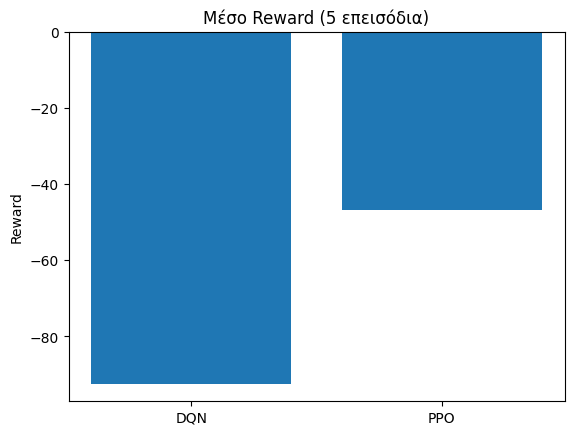

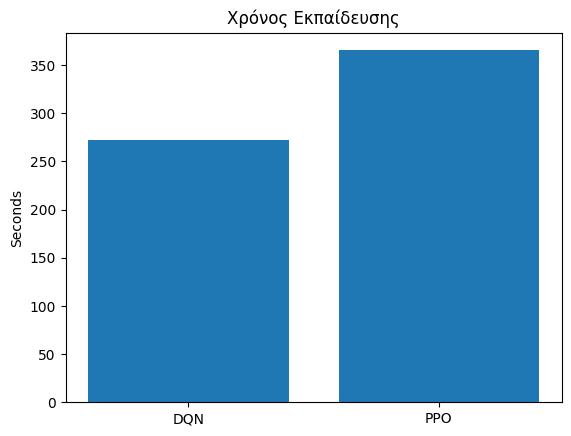

In [14]:
import matplotlib.pyplot as plt

algorithms = ["DQN", "PPO"]
rewards = [dqn_reward, ppo_reward]
times = [dqn_time, ppo_time]

plt.bar(algorithms, rewards)
plt.title("Μέσο Reward (5 επεισόδια)")
plt.ylabel("Reward")
plt.show()

plt.bar(algorithms, times)
plt.title("Χρόνος Εκπαίδευσης")
plt.ylabel("Seconds")
plt.show()


Τα αρνητικά rewards οφείλονται στη φύση της συνάρτησης ανταμοιβής του περιβάλλοντος LunarLander, η οποία επιβάλλει ποινές για ασταθή πτήση, κατανάλωση καυσίμων και αποτυχημένη προσγείωση. Με περιορισμένο αριθμό βημάτων εκπαίδευσης (100.000), οι πράκτορες δεν έχουν ακόμη συγκλίνει σε βέλτιστη πολιτική.

## Επανάληψη με βέλτιστες παραμέτρους

In [15]:
from stable_baselines3.common.evaluation import evaluate_policy
import time

start = time.time()

dqn = DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-4,
    gamma=0.99,
    buffer_size=10000,
    batch_size=128,
    target_update_interval=1000,
    train_freq=4,
    learning_starts=1000,
    exploration_fraction=0.1,
    exploration_final_eps=0.01,
    verbose=1,
)

dqn.learn(total_timesteps=200_000)

dqn_time = time.time() - start
dqn_reward, _ = evaluate_policy(dqn, env, n_eval_episodes=5)

print("DQN Mean Reward (5 episodes):", dqn_reward)
print("DQN Training Time (sec):", dqn_time)

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 78.5     |
|    ep_rew_mean      | -162     |
|    exploration_rate | 0.984    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 4359     |
|    time_elapsed     | 0        |
|    total_timesteps  | 314      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 76.6     |
|    ep_rew_mean      | -169     |
|    exploration_rate | 0.97     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 4751     |
|    time_elapsed     | 0        |
|    total_timesteps  | 613      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 82.9     |
|    ep_rew_mean      | -141   

In [16]:
start = time.time()

ppo = PPO(
    "MlpPolicy",
    env,
    learning_rate=2.5e-4,
    n_steps=1024,
    batch_size=64,
    n_epochs=4,
    gamma=0.999,
    gae_lambda=0.98,
    clip_range=0.2,
    ent_coef=0.01,
    vf_coef=0.5,
    max_grad_norm=0.5,
    verbose=1,
)

ppo.learn(total_timesteps=200_000)

ppo_time = time.time() - start
ppo_reward, _ = evaluate_policy(ppo, env, n_eval_episodes=5)

print("PPO Mean Reward (5 episodes):", ppo_reward)
print("PPO Training Time (sec):", ppo_time)

env.close()

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 99.3     |
|    ep_rew_mean     | -133     |
| time/              |          |
|    fps             | 890      |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 1024     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 89.6          |
|    ep_rew_mean          | -161          |
| time/                   |               |
|    fps                  | 745           |
|    iterations           | 2             |
|    time_elapsed         | 2             |
|    total_timesteps      | 2048          |
| train/                  |               |
|    approx_kl            | 0.00047107314 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2       

Οι υπερπαράμετροι των αλγορίθμων DQN και PPO επιλέχθηκαν βάσει υλοποιήσεων και προτάσεων από το διαδίκτυο (GitHub projects, Stable-Baselines3 Zoo, pre-trained agents).
Με 200.000 timesteps, ο PPO επιτυγχάνει ταχύτερη και σταθερότερη σύγκλιση σε σχέση με τον DQN, ο οποίος απαιτεί περισσότερα βήματα για αντίστοιχη απόδοση.